In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import random

In [2]:
data = sio.loadmat('./IMAGES.mat')
IMAGES = data['IMAGES']
sess = tf.InteractiveSession()
patch_size = 8
hidden_size = 5 * 5
numpatches = 10000

def sample_images():
    patches = np.zeros((numpatches, patch_size * patch_size))
    
    for i in range(numpatches):
        img_idx = np.random.randint(10)
        row = np.random.randint(512 - 7) # 0 ~ 504
        col = np.random.randint(512 - 7)
        patches[i, :] = np.reshape(IMAGES[row:row + 8, col:col + 8, img_idx], [patch_size * patch_size])
    return patches

In [3]:
def normalize_data(data):
    data = data - np.mean(data, axis=1).reshape(data.shape[0], 1) #mean of data
    data_std = 3 * np.std(data)
    for i in range(numpatches):
        for j in range(patch_size * patch_size):
            if data[i, j] < -data_std:
                data[i, j] = -data_std
            elif data[i, j] > data_std:
                data[i, j] = data_std
    data /= data_std
    data = (data + 1) * 0.4 + 0.1
    return data

In [4]:
visible = tf.placeholder(tf.float32, shape = [None, patch_size * patch_size])
hidden = tf.placeholder(tf.float32, shape = [patch_size, patch_size])

sparsity_param = 0.01
beta = 3 # weight of sparsity penalty term
lambd = 0.0001 # weight decay parameter

W1 = tf.Variable(tf.truncated_normal([patch_size * patch_size, hidden_size], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([hidden_size], stddev=0.1))

W2 = tf.Variable(tf.truncated_normal([hidden_size, patch_size * patch_size], stddev=0.1))
b2 = tf.Variable(tf.truncated_normal([patch_size * patch_size], stddev=0.1))

a2 = tf.nn.sigmoid(tf.matmul(visible, W1) + b1)
y = tf.nn.sigmoid(tf.matmul(a2, W2) + b2)

rho = tf.reduce_mean(a2, 0)
sparsity_penalty = tf.reduce_sum(sparsity_param * tf.log(sparsity_param / rho) + (1 - sparsity_param) * \
                                        tf.log((1 - sparsity_param) / (1 - rho)))

cost = tf.reduce_mean(tf.reduce_sum(tf.square(y - visible), 1)) + \
                lambd * tf.reduce_sum(tf.square(W1)) + lambd * tf.reduce_sum(tf.square(W2)) + \
                beta * sparsity_penalty
                

train_step = tf.train.AdamOptimizer(1e-4).minimize(cost)

sess.run(tf.global_variables_initializer())

In [5]:
patches = list(normalize_data(sample_images()))
mini_batch = 128


for i in range(30000):
    batch = random.sample(patches, mini_batch)
    train_step.run(feed_dict = {visible: batch})
    if i % 1000 == 0:
        print(cost.eval(feed_dict={visible: patches}))
W = np.array(W1.eval())

50.3218
6.85083
2.31755
1.35147
1.10426
1.04952
1.04157
1.04084
1.04058
1.04037
1.04021
1.0401
1.04002
1.03993
1.03983
1.03968
1.03946
1.03918
1.03882
1.03838
1.03785
1.03715
1.03623
1.03505
1.03352
1.03163
1.02917
1.02627
1.02294
1.01934


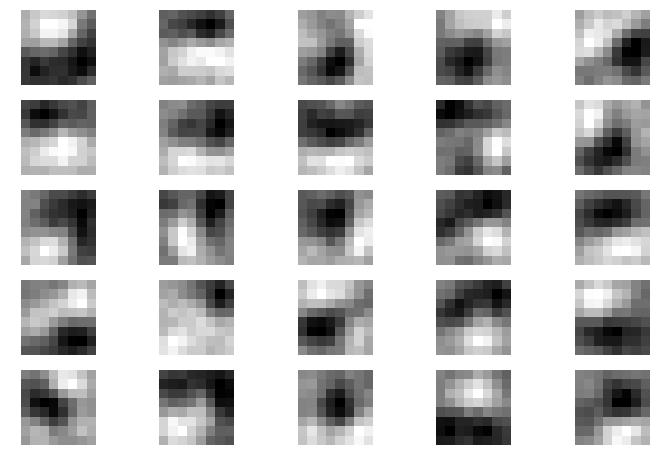

In [6]:
def visualize(W1):
    features = np.zeros((hidden_size, patch_size * patch_size))
    for i in range(hidden_size):
        for j in range(patch_size * patch_size):
            features[i, j] = W1[j, i] / np.sqrt(np.sum(np.square(W1[:, i])))
    return features

features = visualize(W)

plt.figure(figsize=(12, 8))
for i in range(25):
    feature = features[i].reshape(patch_size, patch_size)
    fig = plt.subplot(5, 5, i + 1)
    fig.axis('off')
    fig.imshow(feature, cmap='gray')
plt.show()

In [27]:
a = [1, 2]
help(a.sort)

Help on built-in function sort:

sort(...) method of builtins.list instance
    L.sort(key=None, reverse=False) -> None -- stable sort *IN PLACE*

